# Primero importar las librerias

In [1]:
import torch
from torchvision import datasets as dts
import gzip
import os
from os.path import isfile, join
import numpy as np

# Descargar Dataset

In [2]:
#descargar los datos en la carpeta mnist_raw
dts.MNIST(root='./mnist_raw',train=True, download=True, transform=None)
dts.MNIST(root='./mnist_raw',train=False, download=True, transform=None)

100%|██████████| 9912422/9912422 [00:00<00:00, 137260227.88it/s]


Extracting ./mnist_raw/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist_raw/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 17816692.72it/s]


Extracting ./mnist_raw/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist_raw/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 36693166.86it/s]

Extracting ./mnist_raw/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist_raw/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 15526103.32it/s]

Extracting ./mnist_raw/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist_raw/MNIST/raw



Dataset MNIST
    Number of datapoints: 10000
    Root location: ./mnist_raw
    Split: Test

Deberia quedar algo así


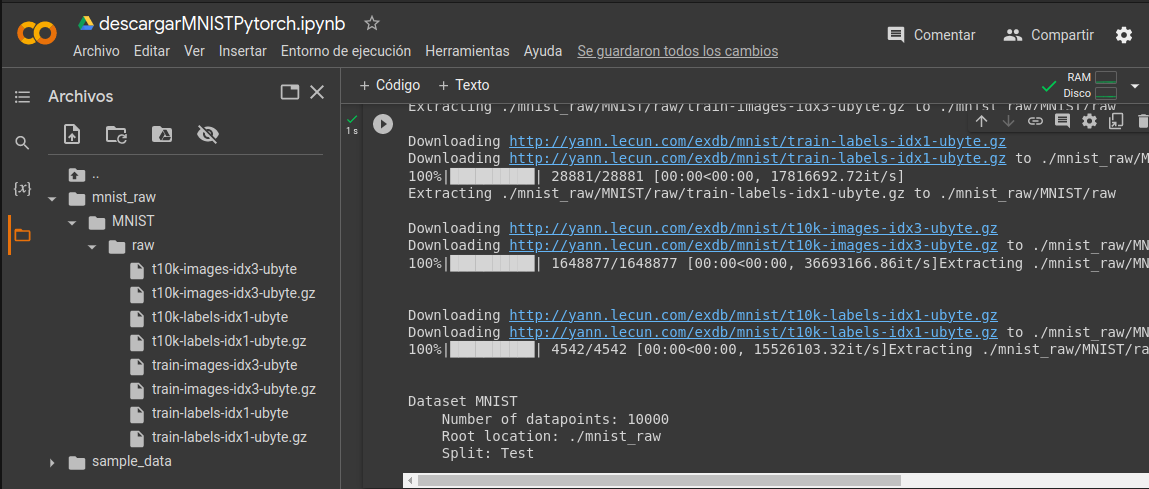

Eliminar los archivos que no terminen en .gz. Al final la carpeta raw solo debe tener los siguientes archivos.

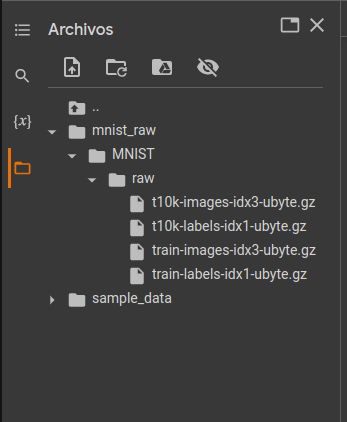


# Seguir con el tutorial

In [3]:
mnist_path = './mnist_raw/MNIST/raw'

In [4]:
def list_files(mnist_path):
    return [join(mnist_path,f) for f in os.listdir(mnist_path) if isfile(join(mnist_path, f))]

In [5]:
def get_images(mnist_path):
    for f in list_files(mnist_path):
        if 'train-images' in f:
            with gzip.open(f, 'rb') as data:
                _ = int.from_bytes(data.read(4), 'big')
                num_images = int.from_bytes(data.read(4), 'big')
                rows = int.from_bytes(data.read(4), 'big')
                cols = int.from_bytes(data.read(4), 'big')
                train_images = data.read()
                x_train = np.frombuffer(train_images, dtype=np.uint8)
                x_train = x_train.reshape((num_images, rows, cols))
        elif 'train-labels' in f:
            with gzip.open(f, 'rb') as data:
                train_labels = data.read()[8:]
                y_train = np.frombuffer(train_labels, dtype=np.uint8)
        if 't10k-images' in f:
            with gzip.open(f, 'rb') as data:
                _ = int.from_bytes(data.read(4), 'big')
                num_images = int.from_bytes(data.read(4), 'big')
                rows = int.from_bytes(data.read(4), 'big')
                cols = int.from_bytes(data.read(4), 'big')
                test_images = data.read()
                x_test = np.frombuffer(test_images, dtype=np.uint8)
                x_test = x_test.reshape((num_images, rows, cols))
        elif 't10k-labels' in f:
            with gzip.open(f, 'rb') as data:
                test_labels = data.read()[8:]
                y_test = np.frombuffer(test_labels, dtype=np.uint8)

    return x_train, y_train, x_test, y_test

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
x_train_num, y_train_num, x_test_num, y_test_num = get_images(mnist_path)

In [8]:
#datos de entrenamiento
x_train = x_train_num[:50000].reshape(50000, -1).astype(np.float32)/255
y_train = y_train_num[:50000].reshape(50000, 1)
#datos de validacion
x_val = x_train_num[50000:].reshape(10000, -1).astype(np.float)/255
y_val = y_train_num[50000:].reshape(10000, 1)
#datos para prueba
x_test = x_test_num.copy().reshape(10000, -1).astype(np.float)/255
y_test = y_test_num.copy().reshape(10000, 1)


<ipython-input-8-5c57b4b099f6>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_val = x_train_num[50000:].reshape(10000, -1).astype(np.float)/255
<ipython-input-8-5c57b4b099f6>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_test = x_test_num.copy().reshape(10000, -1).astype(np.float)/255


In [9]:
def plot_number(image):
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

La imagen muestreada representa un: [4]


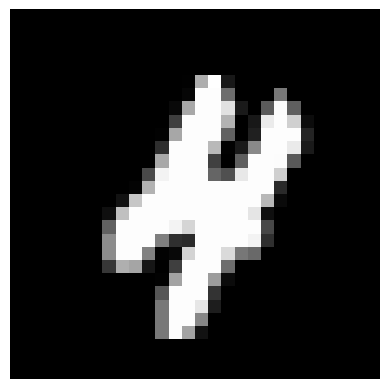

In [11]:
rnd_idx = np.random.randint(len(y_test))
print(f'La imagen muestreada representa un: {y_test[rnd_idx]}')
plot_number(x_test_num[rnd_idx])